In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from tqdm import tqdm_notebook

In [0]:
from sklearn.datasets import make_blobs

In [0]:
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list("", [ 'red','yellow','green'])

In [181]:
data, labels=make_blobs(n_samples=1000, centers=4 ,n_features=2 ,random_state=0)
print(data.shape, labels.shape)                        

(1000, 2) (1000,)


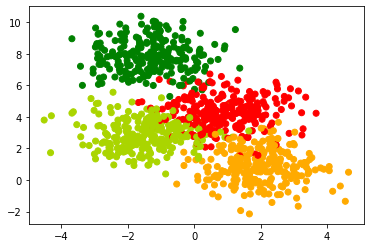

In [182]:
plt.scatter(data[:,0],data[:,1],cmap=my_cmap,c=labels)
plt.show()

In [0]:
label_orig=labels
labels=np.mod(label_orig,2)

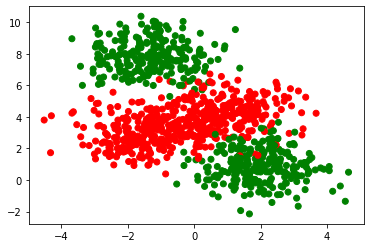

In [184]:
plt.scatter(data[:,0], data[:,1], c=labels,cmap=my_cmap)
plt.show()

In [185]:
X_train, X_val , y_train , y_val=train_test_split(data, labels, stratify=labels ,random_state=0)
print(X_train.shape , X_val.shape)

(750, 2) (250, 2)


In [0]:
class FirstFeedForward():

  def _int_(self):
    self.w1=np.random.rand()
    self.w2=np.random.rand()
    self.w3=np.random.rand()
    self.w4=np.random.rand()
    self.w5=np.random.rand()
    self.w6=np.random.rand()
    self.b0=0
    self.b1=0
    self.b2=0

  def sigmoid(self,x):
    return 1.0/ (1.0 + np.exp(-x))
  
  def forward(self,x):
   self.x1,self.x2= x
   self.a1 = self.w1 * self.x1 + self.w2 *self.x2 + self.b0
   self.h1 = self.sigmoid(self.a1)

   self.a2= self.w3 * self.x1 + self.w4 *self.x2 + self.b1
   self.h2 = self.sigmoid(self.a2)

   self.a3 = self.w5 * self.h1 + self.w6 *self.h2 + self.b2
   self.h3 = self.sigmoid(self.a3)

   return self.h3

  def grad(self, x , y):
   self.forward(x)

   self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
   self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
   self.db2 = (self.h3-y) * self.h3*(1-self.h3)

   self.dw1 =  (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
   self.dw2 =  (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
   self.db0 =  (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)

   self.dw3 =  (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
   self.dw4 =  (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
   self.db1 =  (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)

  def fit(self, X,Y,epochs=1 , learning_rate=1, initialise=True, display_loss=False):

    if initialise:
     self.w1=np.random.rand()
     self.w2=np.random.rand()
     self.w3=np.random.rand()
     self.w4=np.random.rand()
     self.w5=np.random.rand()
     self.w6=np.random.rand()
     self.b0=0
     self.b1=0
     self.b2=0

    if display_loss:
      loss = {}
    for i in tqdm_notebook (range(epochs), total=epochs, unit="epoch"):
      dw1,dw2,dw3,dw4,dw5,dw6,db0,db1,db2 = [0]* 9
      for x,y in zip(X, Y):
        self.grad(x,y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db0 += self.db0
        db1 += self.db1
        db2 += self.db2

      m=X.shape[1]
      self.w1 -= learning_rate * dw1 /m
      self.w2 -= learning_rate * dw2 /m
      self.w3 -= learning_rate * dw3 /m
      self.w4 -= learning_rate * dw4 /m
      self.w5 -= learning_rate * dw5 /m
      self.w6 -= learning_rate * dw6 /m
      self.db0 -= learning_rate * db0 /m
      self.db1 -= learning_rate * db1 /m
      self.db2 -= learning_rate * db2 /m

      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred,Y)

    if display_loss:
          plt.plot(loss.values())
          plt.xlabel("Epochs")
          plt.ylabel("MSE")
          plt.show()
   
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  
    



In [208]:
ffn = FirstFeedForward()
ffn.fit(X_train,y_train,epochs=10,learning_rate=0.1, display_loss=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [209]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binary = (Y_pred_train >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binary , y_train)
print("accuracy score for training ", round(accuracy_train,2)) 

Y_pred_val = ffn.predict(X_val)
Y_pred_binary_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_val = accuracy_score(Y_pred_binary_val , y_val)
print("accuracy score for testing ", round(accuracy_val,2)) 

accuracy score for training  0.73
accuracy score for testing  0.72


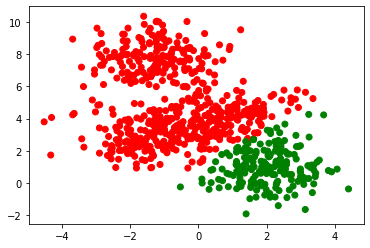

In [210]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binary,cmap=my_cmap)
plt.show()

In [201]:
print(X_train.shape[0])

750
